## **K Modes Clustering**

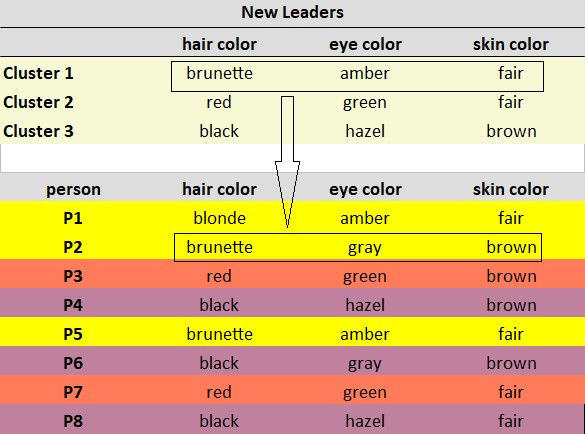

#### K-mode clustering is an unsupervised machine-learning technique used to group a set of data objects into a specified number of clusters, based on their categorical attributes. The algorithm is called “K-Mode” because it uses modes (i.e. the most frequent values) instead of means or medians to represent the clusters.

#### In K-means clustering when we used categorical data after converting it into a numerical form. it doesn’t give a good result for high-dimensional data.
#### So, Some changes are made for categorical data :

#### - Replace Euclidean distance with Dissimilarity metric
#### - Replace Mean by Mode for cluster centers.
#### - Apply a frequency-based method in each iteration to update the mode.
#### And then this is called K-MODE Clustering because of MODE.

### **The K-modes Algorithm in 3 Steps:**
1. **Initialization:** Choose K random data points as initial centroids.
2. *Assignment:* For each data point, find the closest centroid based on the chosen categorical distance metric or just pick *Hamming distance*, which counts the number of mismatching features between the point and the centroid. **One extra functionality which I have implemented in my class is feature weights with which we can give more or less importance to few features.**
3. **Re-centering:** Update the centroids by finding the mode (most frequent category) for each attribute across all points assigned to that centroid.
Steps 2 and 3 repeat until the centroids stabilize and no further reassignment occurs. Voilà, your data is now categorized into K clusters!


Similarity and dissimilarity measurements are used to determine the distance between the data objects in the dataset.In the case of K-modes, these distances are calculated using a dissimilarity measure called the Hamming distance.The Hamming distance between two data objects is the number of categorical attributes that differ between the two objects.
Let x and y be two categorical data objects defined by m features or attributes.

$d(x,y)\ =  \sum _ {j=1}^ {m} $ $ \delta $ ( $ x_ {j} $ , $ y_ {j} $ )\
  where,\
 $ \delta $ ( $ x_ {j} $ , $ y_ {j} $ )= $ \begin{cases}0\  \ if\ x_{j}\ =
  \ y_{j}\\1\ if\ x_{j}\ !=  \ y_{j}\end{cases} $ \\
But in our class implementation,I have also introduced feature weights which tweaks the above equation as :\
$d(x,y)\ = \sum _ {j=1}^ {m} $ $ w_ {j} $ $ \delta $ ( $ x_ {j} $ , $ y_ {j} $ )\
where,\
 $ w_j\ is\ weight\ of\ j^{th}\ feature\ and\ \delta $ ( $ x_ {j} $ , $ y_ {j} $ )= $ \begin{cases}0\  \ if\ x_{j}\ = \ y_{j}\\1\ if\ x_{j}\ \ != \ y_{j}\end{cases}$


##   

##   

##   

##   

##   

##   

##   

##   

##   

##   

##   

##   

## **`KModes Class Implementation from Scratch`**

In [ ]:
class my_KModes:

  @classmethod
  def get_label(cls, pt, cluster_centers, feature_weights):
    weighted_cluster_dissim = np.sum((pt != cluster_centers) * feature_weights, axis = 1)
    return np.argmin(weighted_cluster_dissim)

  @classmethod
  def check_random_state(cls, random_state):
    from sklearn.utils import check_random_state
    return check_random_state(random_state)

  @classmethod
  def sample_without_replacement(cls, n_population, n_samples, random_state_):
    from sklearn.utils.random import sample_without_replacement
    return sample_without_replacement(n_population = n_population, n_samples = n_samples, random_state = random_state_)


  def __init__(self, n_clusters = 8, init = 'random', n_init = 10, max_iter = 100, random_state = 1):
    import numpy as np
    import warnings
    self.init = init
    if self.init != 'random' and type(self.init) != np.ndarray and type(self.init) != list:
      raise Exception('The argument for initialization method i.e. init must be either "random", or an array of cluster centers')
    elif self.init == 'random':
      self.n_clusters = n_clusters
      self.n_init = n_init
    else:
      self.init = np.array(self.init)
      self.n_clusters = (self.init).shape[0]
      if n_init > 1:
        warnings.warn("Warning: Setting number of initiliazations i.e. 'n_init' to 1 as cluster centers are passed as argument")
      self.n_init = 1

    self.max_iter = max_iter
    self.random_state = random_state


  def fit(self, X, feature_weights = []):
    import numpy as np
    import pandas as pd

    n, d = X.shape

    if feature_weights == []:
      self.feature_weights = (1/d) * np.ones(d,)
    else:
      feature_weights = np.array(feature_weights)
      if feature_weights.shape[0] != d:
        raise Exception("The dimensions of feature weights doesn't match with the dimensions of the data")
      else:
        self.feature_weights = feature_weights/np.sum(feature_weights)

    if type(self.init) == np.ndarray  and ((self.init).shape[1] != X.shape[1]):
      raise Exception("The dimensions of the initialized cluster centers doesn't match with the dimensions of the data")
    random_state = self.check_random_state(self.random_state)
    final_cluster_centroids = None
    final_labels = None
    least_cost = np.inf

    for iter_ in range(self.n_init):

      if self.init == 'random':
        cluster_centroids_indexes = my_KModes.sample_without_replacement(n_population = n, n_samples = self.n_clusters, random_state_ = random_state)
        cluster_centroids = X[cluster_centroids_indexes, :]
      else:
        cluster_centroids = self.init

      labels = np.zeros(n,)

      for i in range(self.max_iter):
        for idx, pt in enumerate(X):
          cluster_label = my_KModes.get_label(pt, cluster_centroids, self.feature_weights)
          labels[idx] = cluster_label
        for label in range(self.n_clusters):
          cluster_pts = X[labels == label]
          cluster_centroids[label, :] = pd.DataFrame(cluster_pts).mode(axis = 0).apply(lambda x: np.random.choice(x.dropna())).to_frame().T

      cost = 0

      for label, cluster_centroid in enumerate(cluster_centroids):
        cluster_pts = X[labels == label]
        cost += np.sum((cluster_pts != cluster_centroid) * self.feature_weights)
      if cost < least_cost:
        least_cost = cost
        final_cluster_centroids = cluster_centroids
      final_labels = labels

    self.labels_ = final_labels
    self.cluster_centroids_ = final_cluster_centroids
    self.cost_ = least_cost


  def predict(self, X):
    if 'labels_' not in dir(self):
      raise Exception("The model has not been fit on data yet")
    import numpy as np
    n = X.shape[0]
    labels = np.zeros(n,)

    for idx, pt in enumerate(X):
      cluster_label = my_KModes.get_label(pt, self.cluster_centroids_, self.feature_weights)
      labels[idx] = cluster_label
    return labels


  def fit_predict(self, X):
    import numpy as np
    self.fit(X)
    return self.labels_

## **KModes Time Complexity : $O(n * k * d * i)$**
## **KModes Space Complexity : $O(n + k * d)$ --> n for storing cluster labels for each of the data point and k * d for storing centroid coordinates for k clusters**
## **where n = number of data points, k = number of clusters, d = number of dimensions of data, i = number of iterations, the algo is run**